In [9]:
'''
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)

units - Positive integer, dimensionality of the output space.

===========================================================================================================================================================
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

============================================================================================================================================================
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
===========================================================================================================================================================
tf.keras.layers.Flatten(
    data_format=None, **kwargs
)
===========================================================================================================================================================


'''

"\ntf.keras.layers.Dense(\n    units,\n    activation=None,\n    use_bias=True,\n    kernel_initializer='glorot_uniform',\n    bias_initializer='zeros',\n    kernel_regularizer=None,\n    bias_regularizer=None,\n    activity_regularizer=None,\n    kernel_constraint=None,\n    bias_constraint=None,\n    lora_rank=None,\n    **kwargs\n)\n\nunits - Positive integer, dimensionality of the output space.\n\n===========================================================================================================================================================\ntf.keras.layers.Conv2D(\n    filters,\n    kernel_size,\n    strides=(1, 1),\n    padding='valid',\n    data_format=None,\n    dilation_rate=(1, 1),\n    groups=1,\n    activation=None,\n    use_bias=True,\n    kernel_initializer='glorot_uniform',\n    bias_initializer='zeros',\n    kernel_regularizer=None,\n    bias_regularizer=None,\n    activity_regularizer=None,\n    kernel_constraint=None,\n    bias_constraint=None,\n    **kwargs

In [10]:
import tensorflow as tf

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [13]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [14]:
ds = tfds.load('fashion_mnist', split='train')

**2.Viz Data and Build Dataset**

In [15]:
# for data transformation
import numpy as np

In [16]:
# set up an iterator
dataiterator = ds.as_numpy_iterator()

In [17]:
# to get one image at a time sequentially
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

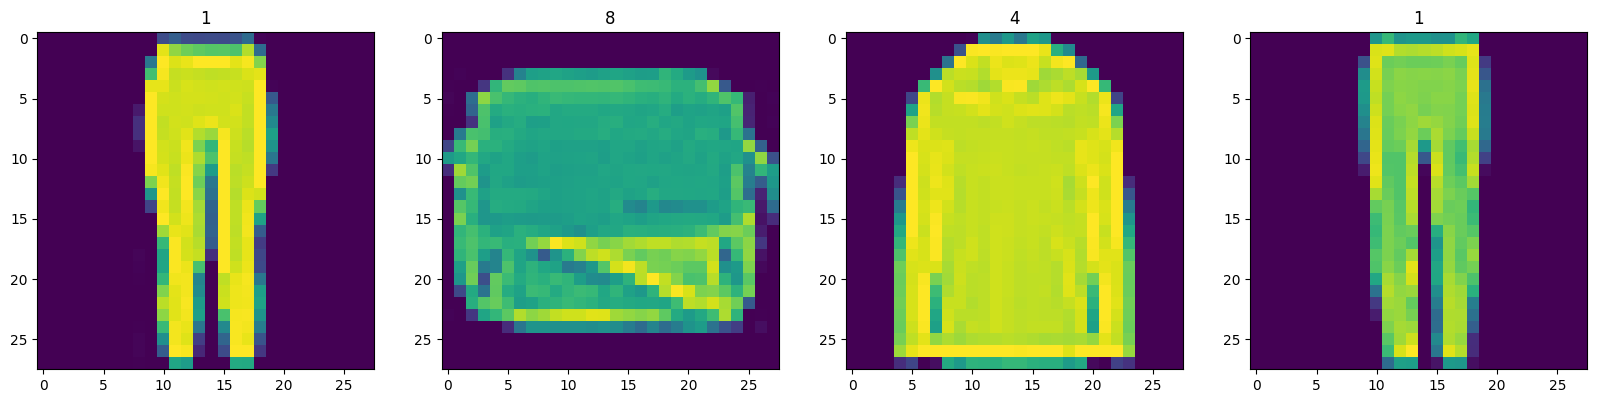

In [18]:
fig, axis = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample = dataiterator.next() # grab an image and label
    axis[idx].imshow(np.squeeze(sample['image'])) # to reduce the shape from 28*28*1 to 28*28
    axis[idx].title.set_text(sample['label']) # to show the labels in top of the image

In [19]:
# scale and return images only - for a good deep learning model the values should be in between 0 and 1 (rather than in between 0 and 255)
def scale_images(data):
    image = data['image']
    return image / 255

In [20]:
'''
Typical steps for building up a data pipleline:
map
cache
shuffle
batch
prefetch
'''

'\nTypical steps for building up a data pipleline:\nmap\ncache\nshuffle\nbatch\nprefetch\n'

In [21]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Caching the dataset for that batch
ds = ds.cache()
# Shuffleling the images
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [22]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

**3. Build the Neural Network**

3.1 Import Modelling Components

In [23]:
#Bring in the sequential api for the generator and the discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

3.2 Build Generator

In [24]:
def build_generator():
    model = Sequential()

    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    # Upsampling block-1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block-2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Downsampling block-1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Downsampling block-2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv Layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [25]:
generator = build_generator()

In [26]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [27]:
# Generate new fashion
img = generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 3s 3s/step


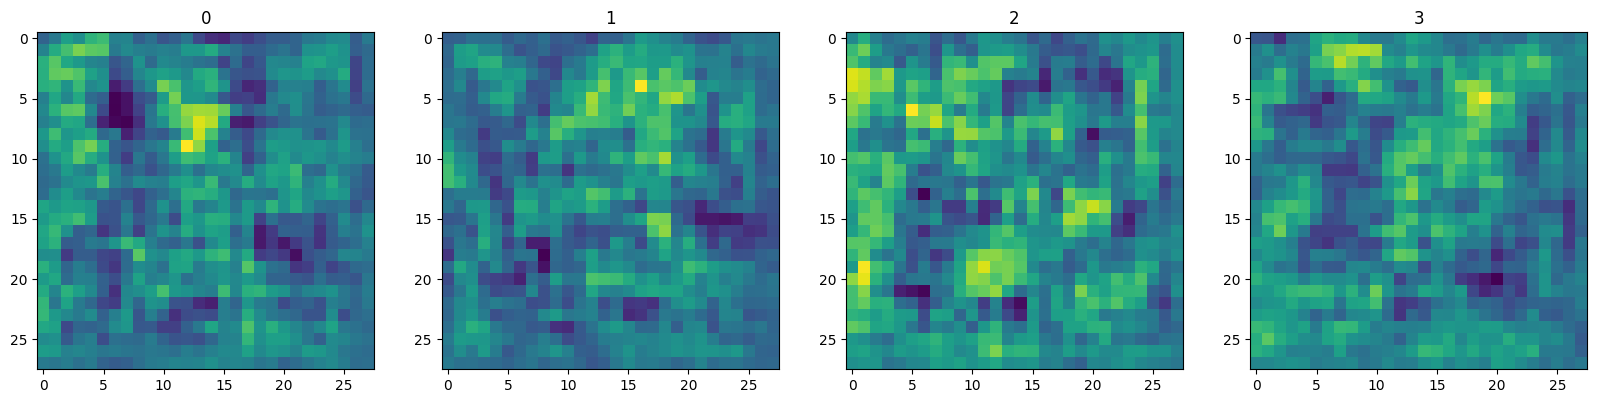

In [28]:
fig, axis = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(img):
    axis[idx].imshow(np.squeeze(image)) # to reduce the shape from 28*28*1 to 28*28
    axis[idx].title.set_text(idx) # to show the labels in top of the image

3.3 Build Discriminator

first, know how to determine the hyperparameters
then get to know hoe the conv2d works like how the layers are created from a single one.

In [29]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [30]:
discriminator = build_discriminator()

In [31]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [32]:
discriminator.predict(img)

1/1 [==============================] - 0s 110ms/step


array([[0.49855936],
       [0.49847165],
       [0.4986275 ],
       [0.49849582]], dtype=float32)

**4.Construct Training Loop**

4.1 Setup Losses and Optimizers

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [34]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

In [35]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

4.2 Build Subclasses Model

In [36]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [37]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile the base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        # TO generate the random input values to pass to our generator we use tf.random.normal((6, 128, 1))
        fake_images = self.generator(tf.random.normal((6, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)


        # Apply backpropogation - for nn to learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128, 1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [38]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [39]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

4.3 Build Callback

In [40]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [41]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

4.4 Train

In [ ]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

4.5 Review Performance

In [ ]:
plt.subtitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

**5. Test Out the Generator**

5.1 Generate Images

In [ ]:
img = generator.predict(tf.random.normal((16, 128, 1)))

5.2 Save the model

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

5.3 Save the Model

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')